# Problem Set 2, due January 26 at 11:59am (i.e., noon).

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [208]:
# importing modules
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [209]:
# importing the data
progresa_df = pd.read_csv("progresa_sample.csv")
progresa_df.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0,0,4.473,1,7,7,21.168384,21.168384,pobre,...,6,0,583,1,35,13,163,1,7,1
1,98,0,0,4.473,1,8,7,21.168384,21.168384,pobre,...,6,0,583,1,35,14,163,1,7,1
2,97,1,0,4.473,1,6,7,21.168384,21.168384,pobre,...,6,0,583,1,35,12,163,2,6,1
3,98,1,0,4.473,1,7,7,21.168384,21.168384,pobre,...,6,0,583,1,35,13,163,2,6,1
4,97,0,0,4.473,1,2,7,21.168384,21.168384,pobre,...,6,0,583,1,35,8,163,3,2,1


---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [210]:
# selecting required columns
summary_df = progresa_df.ix[:,progresa_df.columns-["year", "folnum", "village"]]

#selecting mean & std
summary_df = summary_df.describe()[1:3]

#transposing to avoid scrolling
summary_df.transpose()

/home/aamir/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [211]:
# your code here

progresa_base_poor_df = progresa_df[(progresa_df["year"] == 97) & (progresa_df["poor"] == "pobre")]

progresa_base_poor_df = progresa_base_poor_df.ix[:,progresa_base_poor_df.columns-["year", "folnum", "village"]]

progresa_base_poor_df.mean()

#scipy.stats.ttest(variable for poor,variable for not poor, equal_var = False)

/home/aamir/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


age               10.726541
dist_cap         151.950977
dist_sec           2.473930
fam_n              7.289393
grc                3.535968
grc97              3.535968
hohage            43.888471
hohedu             2.635368
hohsex             0.924004
hohwag           555.336325
indig              0.328360
min_dist         105.659262
sc                 0.819837
sc97               0.819837
sex                0.513875
welfare_index    657.006708
dtype: float64

In [212]:
control_df = progresa_base_poor_df[progresa_base_poor_df["progresa"] != "basal"]
treatment_df = progresa_base_poor_df[progresa_base_poor_df["progresa"] == "basal"]
del control_df["poor"]
del control_df["progresa"]
del treatment_df["poor"]
del treatment_df["progresa"]

In [213]:
index = Series.tolist(treatment_df)
cols = ["Avg Values(Treatment Villages)","Avg Values(Control Villages)"]

In [214]:
mean_table = pd.DataFrame(index = index, columns = cols)

In [215]:
for i in range(16):
    #print(i)
    mean_table["Avg Values(Treatment Villages)"][i]=treatment_df.mean()[i]
    mean_table["Avg Values(Control Villages)"][i]= control_df.mean()[i]

In [216]:
mean_table["Difference (Treat - Control)"] = mean_table["Avg Values(Treatment Villages)"] - mean_table["Avg Values(Control Villages)"]

In [217]:
mean_table

,Avg Values(Treatment Villages),Avg Values(Control Villages),Difference (Treat - Control)
age,10.717,10.742,-0.025032
dist_cap,150.829,153.77,-2.94066
dist_sec,2.45312,2.50766,-0.0545398
fam_n,7.28133,7.30247,-0.0211419
grc,3.5316,3.54305,-0.0114503
grc97,3.5316,3.54305,-0.0114503
hohage,43.6488,44.2769,-0.62809
hohedu,2.66314,2.59035,0.0727912
hohsex,0.924656,0.922947,0.00170878
hohwag,544.34,573.164,-28.824


In [224]:
#scipy.stats.ttest_ind(control_df["age"],treatment_df["age"])[1]
#index
mean_table["p-value"]=""
for i in index:
    mean_table["p-value"][i] = scipy.stats.ttest_ind(control_df[i],treatment_df[i])[1]
    #print(scipy.stats.ttest_ind(control_df[i],treatment_df[i])[1])

In [225]:
mean_table

,Avg Values(Treatment Villages),Avg Values(Control Villages),Difference (Treat - Control),p-value
age,10.717,10.742,-0.025032,0.478559
dist_cap,150.829,153.77,-2.94066,0.000841501
dist_sec,2.45312,2.50766,-0.0545398,0.0356984
fam_n,7.28133,7.30247,-0.0211419,0.427104
grc,3.5316,3.54305,-0.0114503,0.689015
grc97,3.5316,3.54305,-0.0114503,0.689015
hohage,43.6488,44.2769,-0.62809,NaN
hohedu,2.66314,2.59035,0.0727912,0.0110509
hohsex,0.924656,0.922947,0.00170878,NaN
hohwag,544.34,573.164,-28.824,0.000325384


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?



* Part A --
Yes, there are statistically significant values between treatment and control villages as baseline. This is evident from the fact that there are certain p-values in the mean table which are below 0.05.

* Part B --
If there are statistically significant differences at the baseline, then it will imply that there is imbalance. The treatment and control group were not equal in all repsects and characteristics. It will imply that there exists a bias between the 2 groups and this will mean that differences in 2 groups post intervention cannot be fully attributed to the intervention. The differences can also arise because of statistically significant differences in characteristics that existed before the intervention.

* Part C --
This implies that the impact of the treatment should be measured in such a way that effect of the statistically significant characteristics should not be taken into account on the outcome change. The analysis should be adjusted appropriately to accomodate these baseline differences.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

In [250]:
progresa_base_df = progresa_df[progresa_df["year"] == 97]

len(progresa_base_df[progresa_base_df["sc97"] == 1])/len(progresa_base_df)

0.773126213592233

In [262]:
progresa_base_df.columns

Index(['year', 'sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist',
       'dist_cap', 'poor', 'progresa', 'hohedu', 'hohwag', 'welfare_index',
       'hohsex', 'hohage', 'age', 'village', 'folnum', 'grc97', 'sc97'],
      dtype='object')

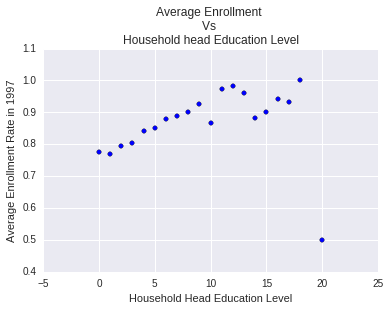

In [270]:
Education_Level_df = progresa_base_df.groupby("hohedu", as_index=False).mean()
                                                              
plt.scatter(Education_Level_df["hohedu"],Education_Level_df["sc97"])
plt.xlabel("Household Head Education Level")
plt.ylabel("Average Enrollment Rate in 1997")
plt.title("Average Enrollment \nVs \nHousehold head Education Level")
plt.show()

*Discuss your results here*

* We can see that the Average enrollment in schools starts at around 0.7 for the 0 level of household head education. 

* The enrollment gradually rises uptill the education level 12, except an ubrupt drop at level 10.

* After 12, the enrollment level shows a fluctuating behavior.

* At the education level 20, the mean enrollment is 0.5, which happens to be very low than the usual.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

In [338]:
progresa_poor_treated_df = progresa_df[(progresa_df["poor"]=="pobre") & (progresa_df["progresa"]=="basal")]
before_treatmeant_df = progresa_poor_treated_df[progresa_poor_treated_df["year"] == 97]
after_treatment_df = progresa_poor_treated_df[progresa_poor_treated_df["year"] == 98]

In [339]:
village_before_treatment_df=before_df.groupby("village", as_index=False).mean()
village_after_treatment_df=after_df.groupby("village",as_index=False).mean()

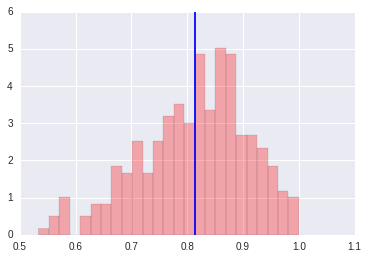

In [340]:
plt.hist(village_before_treatment_df["sc"], normed = True, alpha = 0.3, bins = 25, color = "red")
plt.axvline(village_before_treatment_df["sc"].mean())

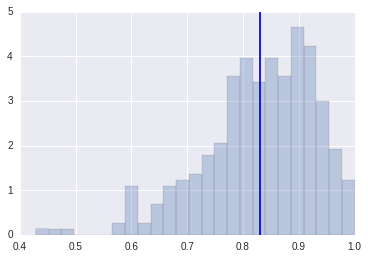

In [341]:
plt.hist(village_after_treatment_df["sc"], alpha = 0.3, normed = True, bins = 25)
plt.axvline(village_after_treatment_df["sc"].mean())

In [342]:
village_after_treatment_df["sc"].mean() - village_before_df["sc"].mean()

0.0156967932034231

In [343]:
village_before_treatment_df["sc"].std()

0.09655283694523796

In [344]:
village_after_treatment_df["sc"].std()

0.10041203392896597

*Discuss your results here*

There is a very small positive effect in the average enrollment in schools before and after treatment. The difference is not very significant.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [350]:
# Your code here
progresa_98_df = progresa_df[progresa_df["year"] == 98]
progresa_98_control_df = progresa_98_df[progresa_98_df["progresa"] == "0"]
progresa_98_treatment_df = progresa_98_df[progresa_98_df["progresa"] != "0"]
progresa_98_poor_control_df = progresa_98_control_df[progresa_98_control_df["poor"] == "pobre"]
progresa_98_poor_treatment_df = progresa_98_treatment_df[progresa_98_treatment_df["poor"] == "pobre"]

In [351]:
progresa_98_poor_treatment_df["sc"].mean()-progresa_98_poor_control_df["sc"].mean()

0.0388421646651228

In [354]:
scipy.stats.ttest_ind(progresa_98_poor_control_df["sc"], progresa_98_poor_treatment_df["sc"])

Ttest_indResult(statistic=nan, pvalue=nan)

*Discuss your results here*

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [ ]:
# Your code here

*Discuss your results here*

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [ ]:
# Your code here

*Discuss your results here*

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [ ]:
# Your code here

*Discuss your results here*

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [ ]:
# Your code here

*Discuss your results here*

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [ ]:
# Your code here

*Discuss your results here*

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?

In [ ]:
# Your code here

*Discuss your results here*

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

*Discuss your results here*